In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
train_data_dir = '/content/drive/MyDrive/yuvraj1'

# Set up the training data generator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='training')

# Set up the validation data generator
validation_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

# Set up the testing data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False for testing to get predictions in order
)

Found 6218 images belonging to 4 classes.
Found 1553 images belonging to 4 classes.
Found 7771 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model and store the history
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50
)

Epoch 1/50
194/194 [==============================] - 33s 132ms/step - loss: 0.6295 - accuracy: 0.7287 - val_loss: 0.3644 - val_accuracy: 0.8757
Epoch 2/50
194/194 [==============================] - 23s 118ms/step - loss: 0.2918 - accuracy: 0.8873 - val_loss: 0.1747 - val_accuracy: 0.9362
Epoch 3/50
194/194 [==============================] - 24s 121ms/step - loss: 0.2169 - accuracy: 0.9227 - val_loss: 0.1680 - val_accuracy: 0.9414
Epoch 4/50
194/194 [==============================] - 24s 122ms/step - loss: 0.1319 - accuracy: 0.9575 - val_loss: 0.1350 - val_accuracy: 0.9525
Epoch 5/50
194/194 [==============================] - 23s 120ms/step - loss: 0.1073 - accuracy: 0.9618 - val_loss: 0.1713 - val_accuracy: 0.9395
Epoch 6/50
194/194 [==============================] - 24s 122ms/step - loss: 0.0946 - accuracy: 0.9667 - val_loss: 0.0917 - val_accuracy: 0.9674
Epoch 7/50
194/194 [==============================] - 24s 123ms/step - loss: 0.0753 - accuracy: 0.9728 - val_loss: 0.0986 - val_ac

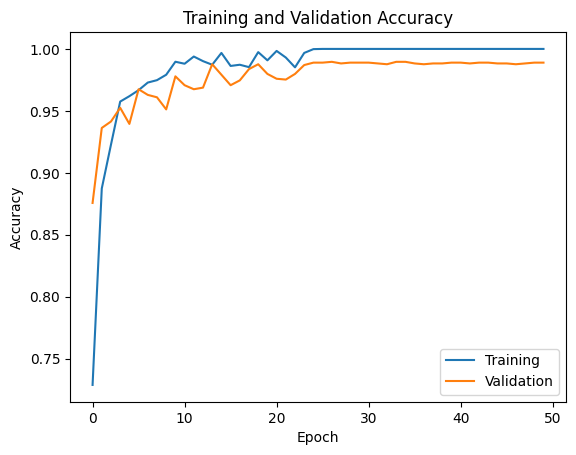

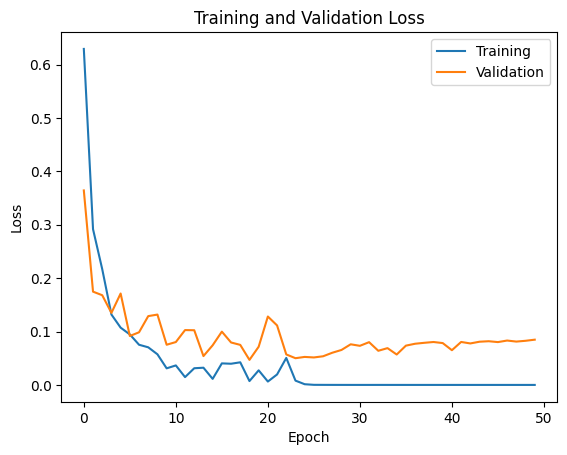

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(['Training', 'Validation'])
plt.show()


# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()

In [ ]:
# Evaluate on training data
training_accuracy = model.evaluate(train_generator)[1]
print(f'Training Accuracy: {training_accuracy * 100:.2f}%')

# Evaluate on validation data
validation_accuracy = model.evaluate(validation_generator)[1]
print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')

# Evaluate on testing data
testing_accuracy = model.evaluate(test_generator)[1]
print(f'Testing Accuracy: {testing_accuracy * 100:.2f}%')

195/195 [==============================] - 18s 91ms/step - loss: 7.2629e-07 - accuracy: 1.0000
Training Accuracy: 100.00%
49/49 [==============================] - 9s 172ms/step - loss: 0.0838 - accuracy: 0.9891
Validation Accuracy: 98.91%
243/243 [==============================] - 25s 104ms/step - loss: 0.0168 - accuracy: 0.9978
Testing Accuracy: 99.78%
